In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

In [31]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
train = pd.read_csv("train.csv")

In [6]:
test = pd.read_csv("test.csv")

In [7]:
submission = pd.read_csv("SampleSubmission.csv")

In [8]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [10]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [13]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [16]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [17]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
#dayofweek는 요일을 가져오는 말
#월(0)~일(6)
train['dayofweek'] = train['datetime'].dt.dayofweek

In [18]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
#dayofweek는 요일을 가져오는 말
#월(0)~일(6)
test['dayofweek'] = test['datetime'].dt.dayofweek

<AxesSubplot:xlabel='year', ylabel='count'>

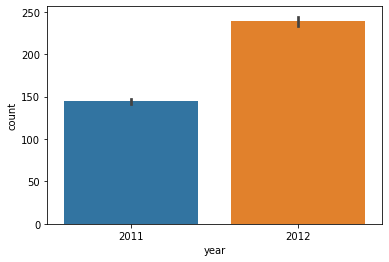

In [19]:
sns.barplot(data = train, x = 'year', y = 'count')

- 년도가 증가함에 따라 수요량이 증가했다. 하지만 2013년도에는 증가할지 감소할지 모름.
- 주어진 데이터 내에서는 년도별로 수요량 차이가 존재함을 알 수 있으므로 예측하는 데 year변수 사용가능


<AxesSubplot:xlabel='month', ylabel='count'>

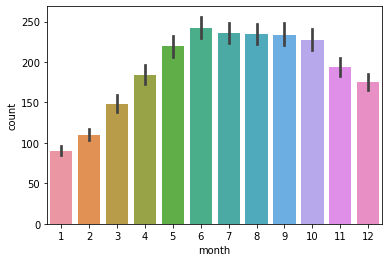

In [20]:
sns.barplot(data = train, x = 'month', y = 'count')

- 비교적 12,1,2월에 자전거 수요량이 적다.
- 6,7,8,9월 달에 자전거 수요량이 가장 많은 편이다. 
- month변수도 예측에 사용할 수 있다.

<AxesSubplot:xlabel='day', ylabel='count'>

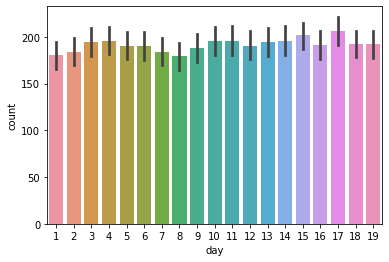

In [21]:
sns.barplot(data = train, x = 'day', y = 'count')

- 일별로는 수요량이 달라지긴하지만 극명한 변화는 보이지 않아서 변수 제거 유무는 추후 결정

<AxesSubplot:xlabel='season', ylabel='count'>

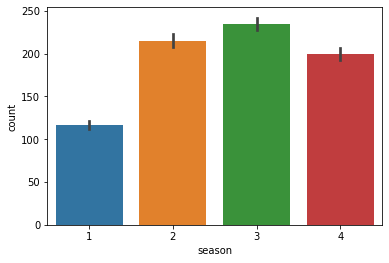

In [22]:
sns.barplot(data = train, x = 'season', y = 'count')

- 월별로 출력했을 때 12,1,2에 가장 수요량이 적었는데, 위 그래프는 다른 결과가 도출됨. 
- season을 나누는 경계가 다름을 알 수 있음

In [23]:
print(train[train['season']==1].month.unique())
print(train[train['season']==2].month.unique())
print(train[train['season']==3].month.unique())
print(train[train['season']==4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


<ipython-input-33-84b112994aeb>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins = 50, ax = ax)


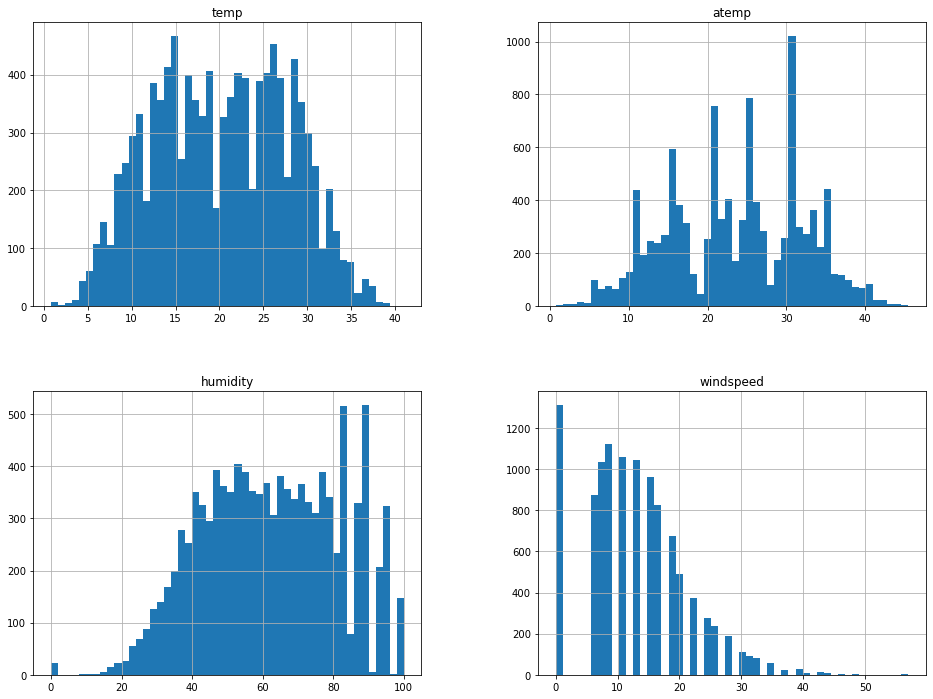

In [33]:
fig, ax = plt.subplots(figsize = (16, 12))

train[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins = 50, ax = ax)
plt.show()

[Text(0.5, 1.0, 'windspeed')]

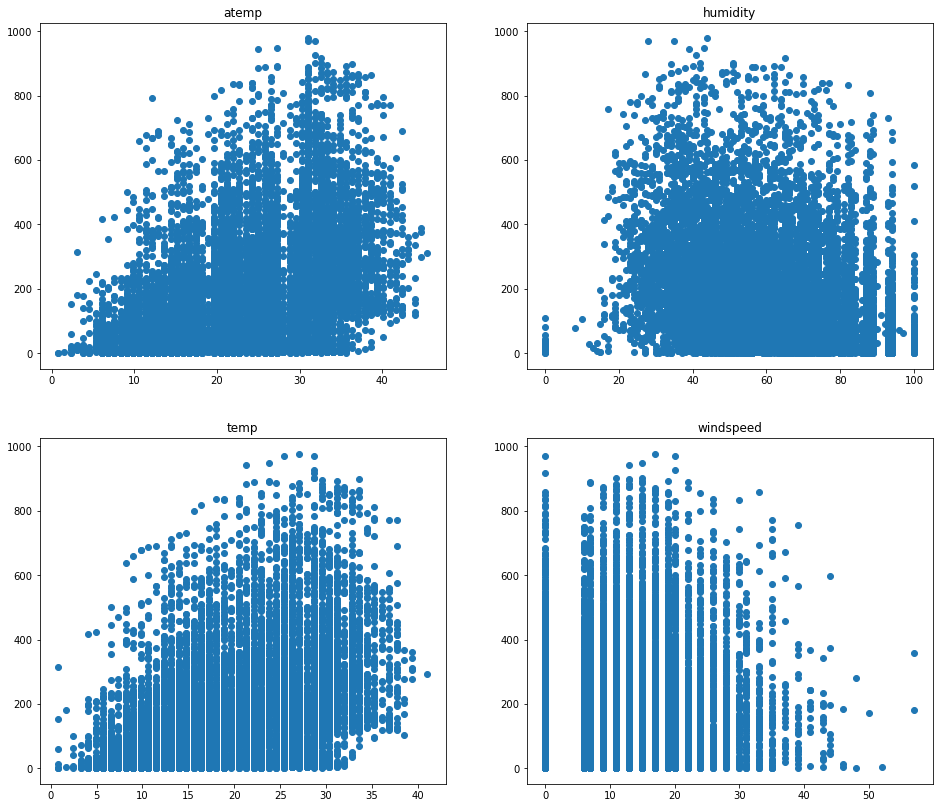

In [37]:
fig, ax = plt.subplots(2,2,figsize=(16,14))

ax[0][0].scatter(train['atemp'], train['count'])
ax[0][1].scatter(train['humidity'], train['count'])
ax[1][0].scatter(train['temp'], train['count'])
ax[1][1].scatter(train['windspeed'], train['count'])

ax[0][0].set(title='atemp')
ax[0][1].set(title='humidity')
ax[1][0].set(title='temp')
ax[1][1].set(title='windspeed')

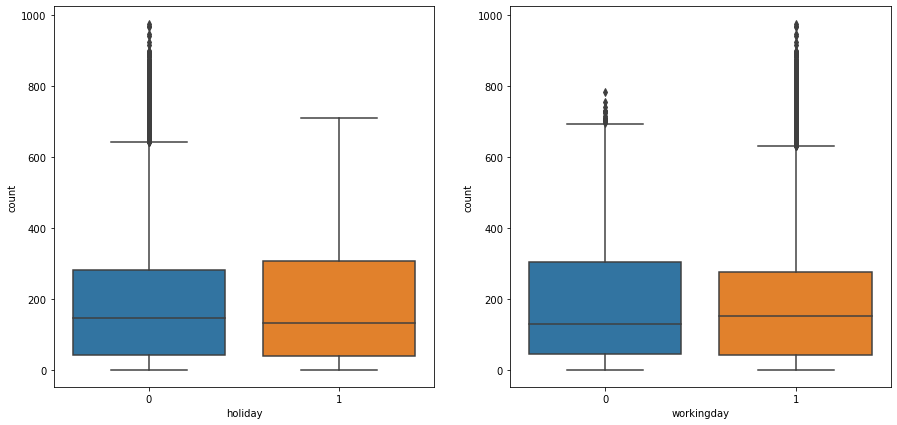

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
# holiday와 workingday의 boxplot
sns.boxplot(data = train, x = 'holiday', y = 'count', ax = ax[0])
sns.boxplot(data = train, x = 'workingday', y = 'count', ax = ax[1])

plt.show()
# 봤을 떄 휴일과 출근일의 자전거 대여량의 차이는 거의 없다. 

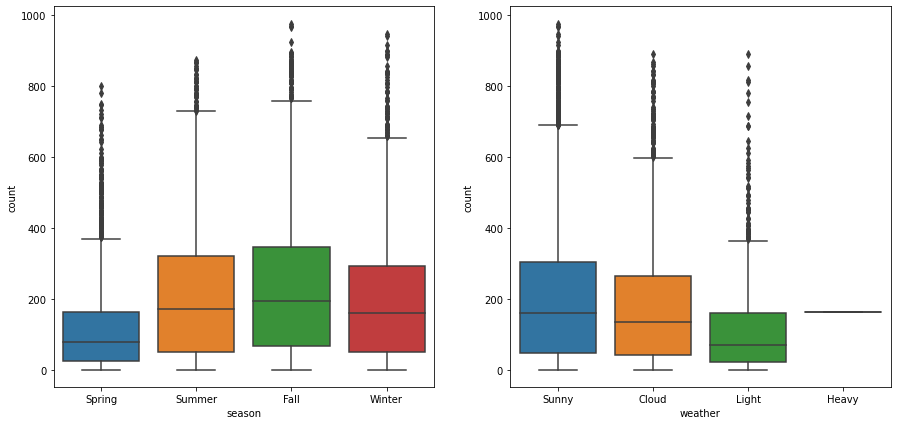

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

sns.boxplot(data = train, x = 'season', y = 'count', ax = ax[0])
sns.boxplot(data = train, x = 'weather', y = 'count', ax = ax[1])

ax[0].set(xticklabels = ['Spring', 'Summer', 'Fall', 'Winter'])
ax[1].set(xticklabels = ['Sunny','Cloud','Light','Heavy'])

plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

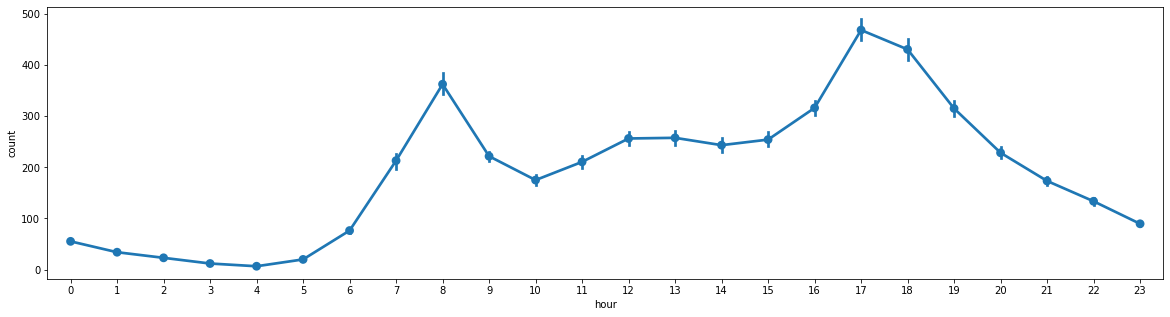

In [48]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)

 * 8, 17시경에 자전거 수요량이 많은 것을 확인할 수 있다. 

<AxesSubplot:xlabel='hour', ylabel='count'>

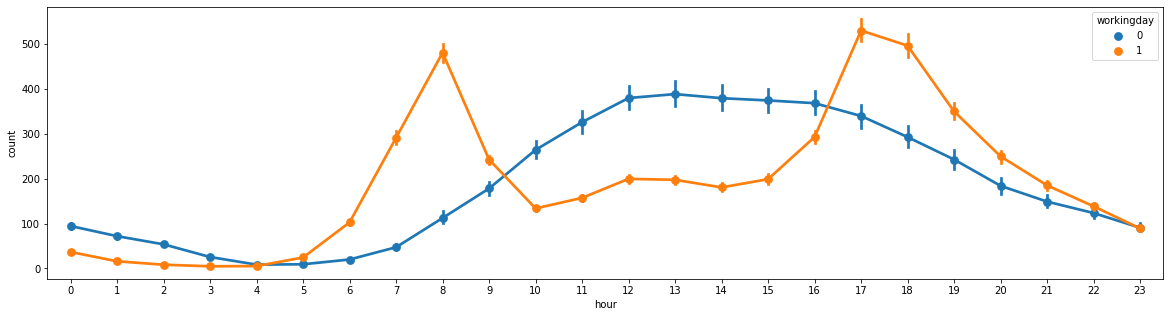

In [51]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

# seaborn에서 카테고리형 데이터를 고려한 그래프를 출력하고 싶으면, hue변수를 추가해준다.
# 따라서 시간대별로 workingday == 1일때, holiday == 0 일때 출력

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax1)

# 근무일일 때 출퇴근 시간에 자전거 수요량이 증가. -> 예측에 영향을 줄 수 있을 것

<AxesSubplot:xlabel='hour', ylabel='count'>

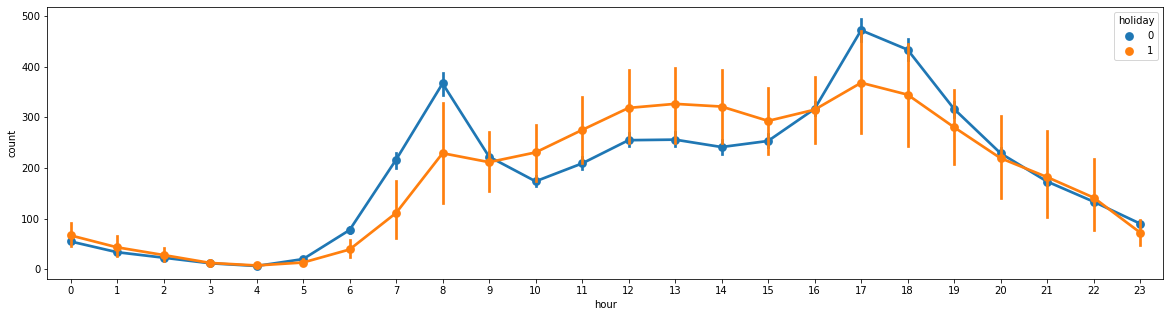

In [52]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20,5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax = ax1)

<AxesSubplot:xlabel='hour', ylabel='count'>

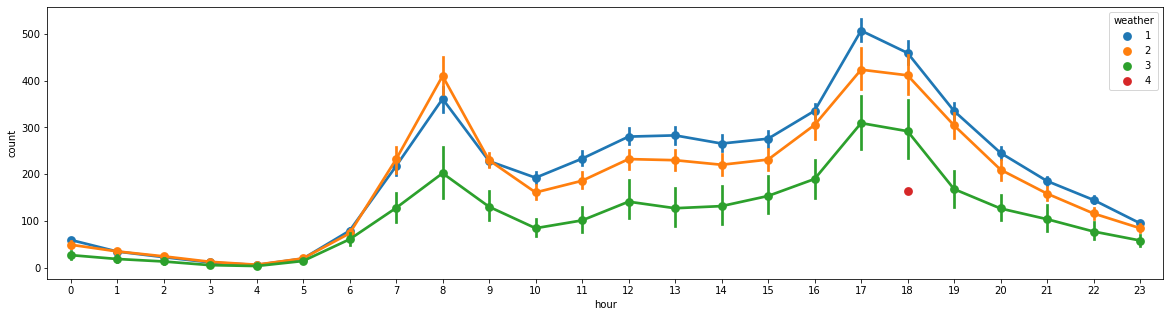

In [53]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20,5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax1)
# 1 : sunny 2 : Cloud 3 : Light 4 : Heavy

<AxesSubplot:xlabel='hour', ylabel='count'>

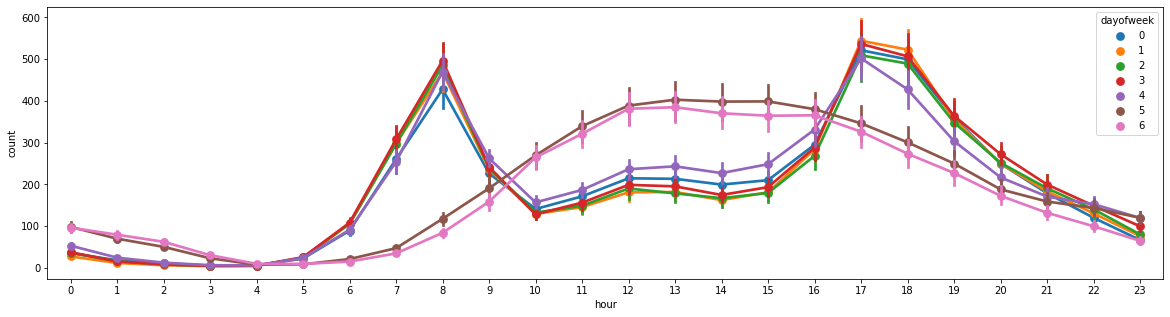

In [55]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax1)

<AxesSubplot:title={'center':'Correlation of Numeric Features with Rental Count'}>

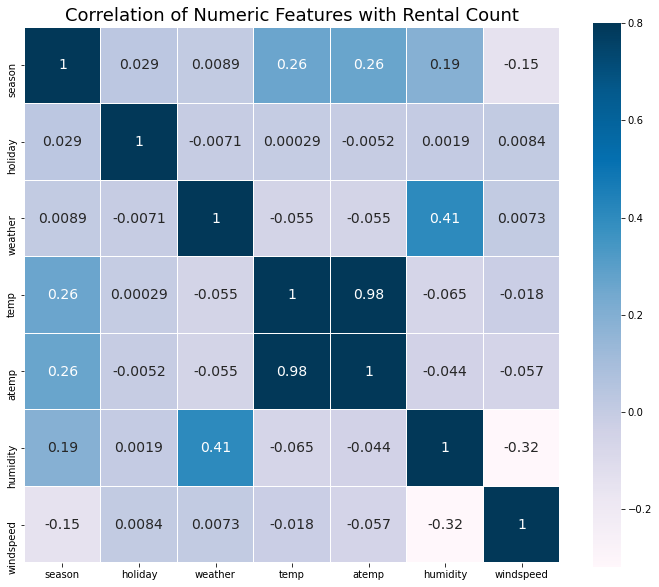

In [66]:
corr_data = train[['datetime', 'season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
colormap = plt.cm.PuBu
f, ax = plt.subplots(figsize = (12, 10))
plt.title('Correlation of Numeric Features with Rental Count', y = 1, size = 18)
sns.heatmap(corr_data.corr(), vmax = .8, linewidths = 0.1, square = True, annot = True, cmap = colormap, linecolor = 'white', annot_kws = {'size':14})

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

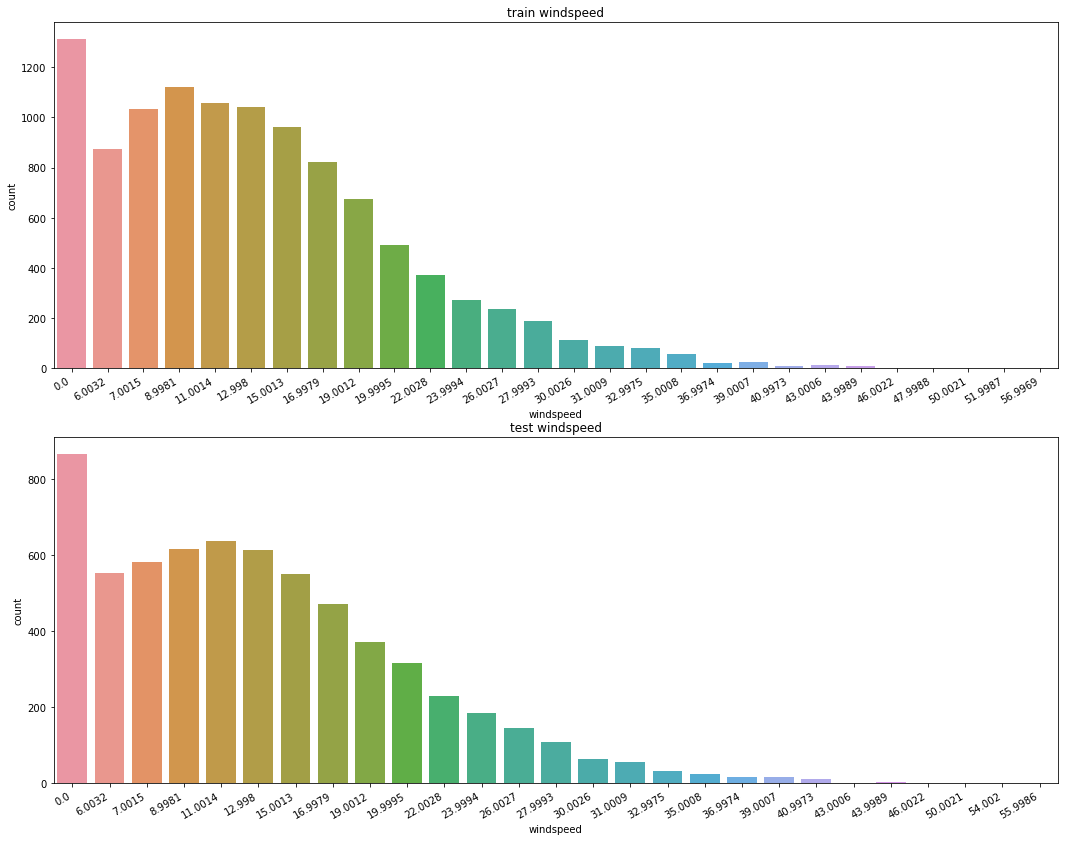

In [75]:
fig, axes = plt.subplots(nrows = 2, figsize = (18, 14))

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'count', title = 'train windspeed')
sns.countplot(data = train, x = 'windspeed', ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right')
axes[1].set(ylabel = 'count', title = 'test windspeed')
sns.countplot(data = test, x = 'windspeed', ax = axes[1])

In [76]:
def concatenate_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
test['year_month'] = test['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
